## Preparing the data

In [1]:
from os.path import dirname, abspath, join, curdir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
datapath = join(dirname(dirname(abspath(curdir))), "exercises", "data", "DNN_data.csv")
datapath

'/Users/a206568245/Projects/MarketAnalysis/Strategies/quantstrategies/exercises/data/DNN_data.csv'

In [3]:
data = pd.read_csv(datapath, parse_dates=["time"], index_col="time")

In [5]:
ticker = data.columns[0]
data["returns"] = np.log(data[ticker] / data[ticker].shift())
data

,EUR_USD,returns
time,,
2017-01-02 23:20:00,1.04574,NaN
2017-01-02 23:40:00,1.04608,0.000325
2017-01-03 00:00:00,1.04575,-0.000316
2017-01-03 00:20:00,1.04672,0.000927
2017-01-03 00:40:00,1.04696,0.000229
...,...,...
2019-12-30 23:00:00,1.12012,0.000080
2019-12-30 23:20:00,1.12030,0.000161
2019-12-30 23:40:00,1.12018,-0.000107


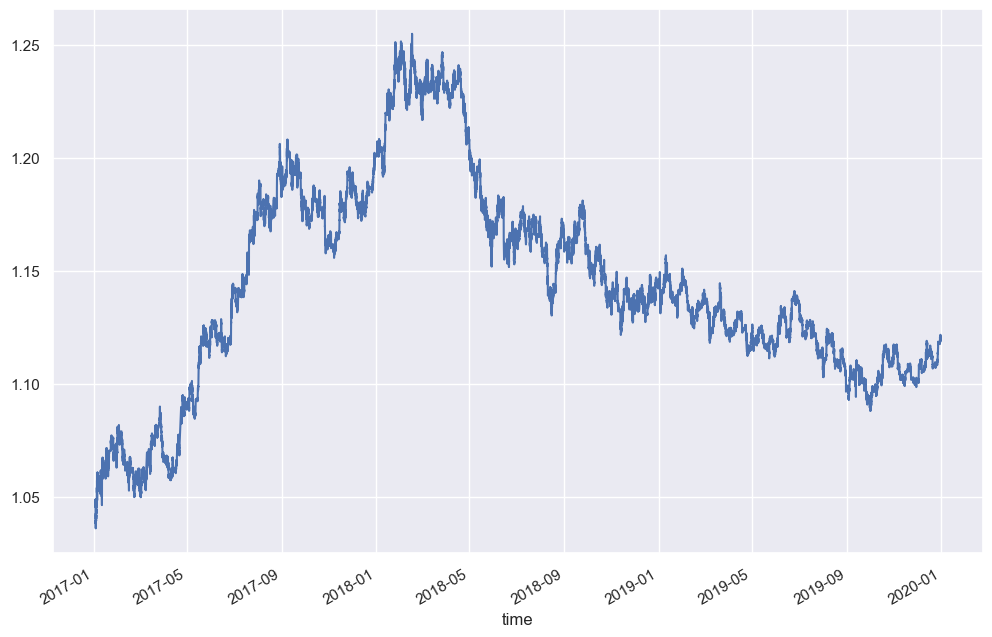

In [6]:
data[ticker].plot(figsize=(12, 8))
plt.show()

In [8]:
window = 50
df = data.copy()

# Market direction
df["dir"] = np.where(df.returns > 0, 1, 0)

# SMA 50 distance between SMA 150
df["sma"] = df[ticker].rolling(window).mean() - df[ticker].rolling(150).mean()

# Distance between current price and SMA 50
df["boll"] = (df[ticker] - df[ticker].rolling(window).mean()) / df[ticker].rolling(window).std()

df["min"] = df[ticker].rolling(window).min() / df[ticker] - 1
df["max"] = df[ticker].rolling(window).max() / df[ticker] - 1

# Momentum feature
df["mom"] = df.returns.rolling(3).mean()

# Volatility feature
df["vol"] = df.returns.rolling(window).std()

df.dropna(inplace=True)
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol
time,,,,,,,,,
2017-01-05 01:00:00,1.05406,0.001728,1,0.002748,2.777610,-0.010948,0.000000,1.384831e-03,0.000803
2017-01-05 01:20:00,1.05226,-0.001709,0,0.002899,2.000277,-0.009047,0.001711,-1.013537e-04,0.000841
2017-01-05 01:40:00,1.05138,-0.000837,0,0.003024,1.604398,-0.008218,0.002549,-2.725461e-04,0.000848
2017-01-05 02:00:00,1.05196,0.000552,1,0.003139,1.718860,-0.008765,0.001996,-6.647612e-04,0.000847
2017-01-05 02:20:00,1.05230,0.000323,1,0.003266,1.742715,-0.009085,0.001673,1.267090e-05,0.000847
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,0.116062,-0.001357,0.001446,5.952275e-05,0.000407
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,0.335572,-0.001517,0.001285,-2.975261e-05,0.000396
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,0.155421,-0.001410,0.001393,4.463867e-05,0.000395


In [9]:
lags = 5
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

for feature in features:
    for lag in range(1, lags + 1):
        col = f"{feature}_lag_{lag}"
        df[col] = df[feature].shift(lag)
        cols.append(col)

df.dropna(inplace=True)
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.001008,0,0.003386,1.322766,-0.008086,0.002683,-4.438906e-05,0.000860,1.0,...,1.267090e-05,-6.647612e-04,-0.000273,-0.000101,0.001385,0.000847,0.000847,0.000848,0.000841,0.000803
2017-01-05 03:00:00,1.05150,0.000247,1,0.003512,1.355157,-0.008331,0.002435,-1.457915e-04,0.000859,0.0,...,-4.438906e-05,1.267090e-05,-0.000665,-0.000273,-0.000101,0.000860,0.000847,0.000847,0.000848,0.000841
2017-01-05 03:20:00,1.05230,0.000761,1,0.003652,1.557089,-0.009085,0.001673,-1.362481e-17,0.000863,1.0,...,-1.457915e-04,-4.438906e-05,0.000013,-0.000665,-0.000273,0.000859,0.000860,0.000847,0.000847,0.000848
2017-01-05 03:40:00,1.05192,-0.000361,0,0.003799,1.375429,-0.008727,0.002034,2.155487e-04,0.000862,1.0,...,-1.362481e-17,-1.457915e-04,-0.000044,0.000013,-0.000665,0.000863,0.000859,0.000860,0.000847,0.000847
2017-01-05 04:00:00,1.05204,0.000114,1,0.003922,1.357637,-0.008840,0.001920,1.711401e-04,0.000852,0.0,...,2.155487e-04,-1.362481e-17,-0.000146,-0.000044,0.000013,0.000862,0.000863,0.000859,0.000860,0.000847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,0.116062,-0.001357,0.001446,5.952275e-05,0.000407,0.0,...,-6.844352e-05,6.545924e-05,0.000021,0.000104,0.000098,0.000408,0.000406,0.000402,0.000401,0.000402
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,0.335572,-0.001517,0.001285,-2.975261e-05,0.000396,1.0,...,5.952275e-05,-6.844352e-05,0.000065,0.000021,0.000104,0.000407,0.000408,0.000406,0.000402,0.000401
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,0.155421,-0.001410,0.001393,4.463867e-05,0.000395,1.0,...,-2.975261e-05,5.952275e-05,-0.000068,0.000065,0.000021,0.000396,0.000407,0.000408,0.000406,0.000402


In [11]:
cols, len(cols)

(['dir_lag_1',
  'dir_lag_2',
  'dir_lag_3',
  'dir_lag_4',
  'dir_lag_5',
  'sma_lag_1',
  'sma_lag_2',
  'sma_lag_3',
  'sma_lag_4',
  'sma_lag_5',
  'boll_lag_1',
  'boll_lag_2',
  'boll_lag_3',
  'boll_lag_4',
  'boll_lag_5',
  'min_lag_1',
  'min_lag_2',
  'min_lag_3',
  'min_lag_4',
  'min_lag_5',
  'max_lag_1',
  'max_lag_2',
  'max_lag_3',
  'max_lag_4',
  'max_lag_5',
  'mom_lag_1',
  'mom_lag_2',
  'mom_lag_3',
  'mom_lag_4',
  'mom_lag_5',
  'vol_lag_1',
  'vol_lag_2',
  'vol_lag_3',
  'vol_lag_4',
  'vol_lag_5'],
 35)

In [12]:
split = int(len(df) * 0.66)
split

36716

In [14]:
train = df.iloc[:split].copy()
test = df.iloc[split:].copy()

len(train), len(test)

(36716, 18915)

### Feature scaling

In [19]:
# Train set parameters for standarization
mu, std = train.mean(), train.std()
mu

EUR_USD       1.156186
returns       0.000002
dir           0.493137
sma           0.000137
boll          0.014627
min          -0.002536
max           0.002411
mom           0.000002
vol           0.000512
dir_lag_1     0.493137
dir_lag_2     0.493137
dir_lag_3     0.493109
dir_lag_4     0.493082
dir_lag_5     0.493082
sma_lag_1     0.000137
sma_lag_2     0.000138
sma_lag_3     0.000138
sma_lag_4     0.000138
sma_lag_5     0.000138
boll_lag_1    0.014692
boll_lag_2    0.014758
boll_lag_3    0.014822
boll_lag_4    0.014901
boll_lag_5    0.015003
min_lag_1    -0.002536
min_lag_2    -0.002537
min_lag_3    -0.002537
min_lag_4    -0.002537
min_lag_5    -0.002537
max_lag_1     0.002411
max_lag_2     0.002410
max_lag_3     0.002410
max_lag_4     0.002410
max_lag_5     0.002410
mom_lag_1     0.000002
mom_lag_2     0.000002
mom_lag_3     0.000002
mom_lag_4     0.000002
mom_lag_5     0.000002
vol_lag_1     0.000512
vol_lag_2     0.000512
vol_lag_3     0.000512
vol_lag_4     0.000512
vol_lag_5  

In [20]:
std

EUR_USD       0.051209
returns       0.000542
dir           0.499960
sma           0.002872
boll          1.441474
min           0.002368
max           0.002249
mom           0.000308
vol           0.000178
dir_lag_1     0.499960
dir_lag_2     0.499960
dir_lag_3     0.499959
dir_lag_4     0.499959
dir_lag_5     0.499959
sma_lag_1     0.002872
sma_lag_2     0.002872
sma_lag_3     0.002872
sma_lag_4     0.002872
sma_lag_5     0.002872
boll_lag_1    1.441498
boll_lag_2    1.441521
boll_lag_3    1.441539
boll_lag_4    1.441568
boll_lag_5    1.441631
min_lag_1     0.002369
min_lag_2     0.002369
min_lag_3     0.002369
min_lag_4     0.002369
min_lag_5     0.002370
max_lag_1     0.002249
max_lag_2     0.002249
max_lag_3     0.002249
max_lag_4     0.002248
max_lag_5     0.002248
mom_lag_1     0.000308
mom_lag_2     0.000308
mom_lag_3     0.000308
mom_lag_4     0.000308
mom_lag_5     0.000308
vol_lag_1     0.000178
vol_lag_2     0.000178
vol_lag_3     0.000178
vol_lag_4     0.000178
vol_lag_5  

In [21]:
train_s = (train - mu) / std
train_s

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,-2.049369,-1.864782,-0.986353,1.131176,0.907501,-2.343163,0.120844,-0.151186,1.955296,1.013809,...,0.034249,-2.166914,-0.892416,-0.336133,4.491683,1.878214,1.877421,1.886149,1.846580,1.632810
2017-01-05 03:00:00,-2.044292,0.452679,1.013809,1.175146,0.929972,-2.446722,0.010616,-0.480699,1.945532,-0.986353,...,-0.151172,0.034318,-2.166859,-0.892397,-0.336148,1.955245,1.878166,1.877372,1.886109,1.846566
2017-01-05 03:20:00,-2.028670,1.400312,1.013809,1.223852,1.070059,-2.765042,-0.328203,-0.006941,1.969567,1.013809,...,-0.480687,-0.151091,0.034354,-2.166841,-0.892262,1.945481,1.955195,1.878117,1.877331,1.886094
2017-01-05 03:40:00,-2.036090,-0.670812,-0.986353,1.275134,0.944035,-2.613900,-0.167328,0.693497,1.965837,1.013809,...,-0.006927,-0.480586,-0.151054,0.034373,-2.166363,1.969516,1.945432,1.955145,1.878077,1.877317
2017-01-05 04:00:00,-2.033747,0.206690,1.013809,1.317990,0.931692,-2.661641,-0.218144,0.549189,1.906115,-0.986353,...,0.693515,-0.006854,-0.480546,-0.151035,0.034258,1.965785,1.969466,1.945382,1.955103,1.878062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,-0.371150,0.109730,1.013809,-0.751750,-0.666287,0.591869,2.884726,0.631436,1.497510,1.013809,...,0.803072,-0.311686,0.403057,0.279207,1.222134,1.508123,1.500459,1.516512,1.511631,1.478503
2018-12-24 00:00:00,-0.369979,0.093487,1.013809,-0.811228,-0.631415,0.569618,2.861061,0.355058,1.485839,1.013809,...,0.631453,0.803095,-0.311648,0.403076,0.279027,1.497468,1.508082,1.500417,1.516477,1.511619
2018-12-24 00:20:00,-0.363925,0.499312,1.013809,-0.874420,-0.545071,0.454691,2.738831,0.412113,1.451858,1.013809,...,0.355074,0.631486,0.803123,-0.311629,0.402863,1.485797,1.497427,1.508041,1.500383,1.516465


In [22]:
train_s.describe()

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,...,3.671600e+04,3.671600e+04,36716.000000,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04
mean,2.025035e-15,-2.709336e-18,-9.289152e-17,-2.167469e-17,-2.167469e-17,3.870480e-17,2.167469e-17,1.238554e-17,-6.966864e-18,-9.405267e-17,...,-2.051354e-17,-5.805720e-18,0.000000,8.902104e-18,1.006325e-17,6.192768e-17,2.709336e-16,-1.509487e-16,-7.818370e-16,2.647408e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.144274e+00,-1.549849e+01,-9.863525e-01,-4.529047e+00,-4.356359e+00,-7.235787e+00,-1.071797e+00,-1.184536e+01,-2.020519e+00,-9.863525e-01,...,-1.184540e+01,-1.184461e+01,-11.844470,-1.184445e+01,-1.184137e+01,-2.020491e+00,-2.020463e+00,-2.020435e+00,-2.020412e+00,-2.020404e+00
25%,-5.047204e-01,-4.535783e-01,-9.863525e-01,-6.775769e-01,-7.397890e-01,-4.856514e-01,-7.532301e-01,-4.608028e-01,-6.703036e-01,-9.863525e-01,...,-4.607903e-01,-4.607017e-01,-0.460688,-4.606689e-01,-4.606499e-01,-6.703023e-01,-6.703010e-01,-6.702996e-01,-6.702984e-01,-6.702982e-01
50%,1.694767e-01,-3.930245e-03,-9.863525e-01,-2.443679e-02,1.612255e-02,2.827041e-01,-2.722921e-01,-6.940924e-03,-1.808806e-01,-9.863525e-01,...,-6.926515e-03,-6.854035e-03,-0.006818,-6.799616e-03,-6.902927e-03,-1.808890e-01,-1.808972e-01,-1.809054e-01,-1.809123e-01,-1.809149e-01
75%,5.827826e-01,4.566312e-01,1.013809e+00,6.582158e-01,7.435334e-01,7.444072e-01,5.001002e-01,4.577224e-01,4.396186e-01,1.013809e+00,...,4.576666e-01,4.576099e-01,0.457642,4.576604e-01,4.574320e-01,4.395978e-01,4.395776e-01,4.395571e-01,4.395401e-01,4.395338e-01
max,1.928443e+00,2.848640e+01,1.013809e+00,3.400707e+00,4.375198e+00,1.070838e+00,9.189929e+00,1.874853e+01,1.035454e+01,1.013809e+00,...,1.874863e+01,1.874756e+01,18.747433,1.874746e+01,1.874230e+01,1.035432e+01,1.035411e+01,1.035389e+01,1.035371e+01,1.035365e+01


In [23]:

import random
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.optimizers import Adam

def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
def cw(df):
    """Class weight"""
    c0, c1 = np.bincount(df["dir"])
    w0 = (1/c0) * (len(df)) / 2
    w1 = (1/c1) * (len(df)) / 2
    return {0:w0, 1:w1}

optimizer = Adam(learning_rate=0.0001)

def create_model(hl=2, hu=100, dropout=False, 
                 rate=0.3, regularize=False, reg=l1(0.0005), 
                 optimizer=optimizer, input_dim=None):
    """Create a Sequential NN Keras model.

    Kwargs:
    ------
    **hl : int, optional
        Number of hidden layers, by default 2
    **hu : int, optional
        Number of unit/nodes per layer, by default 100
    **dropout : bool, optional
        Include dropout regularization, by default False
    **rate : float, optional
        The fraction of input units to drop, by default 0.3
    **regularize : bool, optional
        _description_, by default False
    **reg : _type_, optional
        The L1/L2 regularizer penalty, by default l1(0.0005)
    **optimizer : _type_, optional
        The optimizer function, by default Adam()
    **input_dim : _type_, optional
        The shape of the input, by default None
    """
    if not regularize:
        reg = None

    model = Sequential()
    model.add(Dense(hu, input_dim=input_dim, activity_regularizer=reg, activation="relu"))

    if dropout: 
        model.add(Dropout(rate, seed=100))

    for _ in range(hl):
        model.add(Dense(hu, activation="relu", activity_regularizer=reg))
        if dropout:
            model.add(Dropout(rate, seed=100))

    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model


2023-08-21 14:14:55.642853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
set_seeds(100)
model = create_model(hl=3, hu=50, dropout=True, input_dim=len(cols))
model.fit(x=train_s[cols], y=train_s["dir"], epochs=50, verbose=True, validation_split=0.2, shuffle=False, class_weight=cw(train))

Epoch 1/50


InvalidArgumentError: Graph execution error:

indices[0] = -1 is not in [0, 2)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1762]